In [1]:
import pandas as pd
from google.colab import drive
import os

In [2]:
def cal_feature_scale(x):
  return (x-x.min())/(x.max()-x.min())

# Education

In [264]:
education = pd.read_csv('gender_education.csv')

In [265]:
ed_female = education.loc[education['Sex (2 categories)']=='Female']
ed_male = education.loc[education['Sex (2 categories)']=='Male']

In [266]:
def get_education_summary(df):
  ed1 = df.loc[df['Highest level of qualification (8 categories) Code'].isin([0,1])]
  ed2 = df.loc[df['Highest level of qualification (8 categories) Code'].isin([2,3])]
  ed3 = df.loc[df['Highest level of qualification (8 categories) Code'].isin([4,5])]

  ed1 = ed1.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  ed1.columns = ['Lower tier local authorities Code','Edu_low']

  ed2 = ed2.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  ed2.columns = ['Lower tier local authorities Code','Edu_median']

  ed3 = ed3.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  ed3.columns = ['Lower tier local authorities Code','Edu_high']

  return pd.merge(pd.merge(ed1, ed2), ed3)

In [267]:
ed_female_features = get_education_summary(ed_female)
ed_male_features = get_education_summary(ed_male)

In [271]:
ed_female = ed_female.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
ed_male = ed_male.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()

In [272]:
ed_female = pd.merge(ed_female_features, ed_female)
ed_male = pd.merge(ed_male_features, ed_male)

In [276]:
def get_education_final(df):
  df['low_ed'] = df['Edu_low']/df['Observation']
  df['median_ed'] = df['Edu_median']/df['Observation']
  df['high_ed'] = df['Edu_high']/df['Observation']

  df['low_edu'] = cal_feature_scale(df['low_ed'])
  df['median_edu'] = cal_feature_scale(df['median_ed'])
  df['high_edu'] = cal_feature_scale(df['high_ed'])

  return df

In [277]:
ed_female = get_education_final(ed_female)
#ed_female.to_csv('education_female.csv',index=False)

In [278]:
ed_male = get_education_final(ed_male)
#ed_male.to_csv('education_male.csv',index=False)

# Ethnicity

In [137]:
ethnicity = pd.read_csv('/content/gender_ethnicity.csv')

In [138]:
ethnicity.loc[ethnicity['Lower tier local authorities Code']=='E06000001'].head(20)

,Lower tier local authorities Code,Lower tier local authorities,Sex (2 categories) Code,Sex (2 categories),Ethnic group (20 categories) Code,Ethnic group (20 categories),Observation
0,E06000001,Hartlepool,1,Female,-8,Does not apply,0
1,E06000001,Hartlepool,1,Female,1,"Asian, Asian British or Asian Welsh: Bangladeshi",146
2,E06000001,Hartlepool,1,Female,2,"Asian, Asian British or Asian Welsh: Chinese",119
3,E06000001,Hartlepool,1,Female,3,"Asian, Asian British or Asian Welsh: Indian",178
4,E06000001,Hartlepool,1,Female,4,"Asian, Asian British or Asian Welsh: Pakistani",142
5,E06000001,Hartlepool,1,Female,5,"Asian, Asian British or Asian Welsh: Other Asian",272
6,E06000001,Hartlepool,1,Female,6,"Black, Black British, Black Welsh, Caribbean o...",172
7,E06000001,Hartlepool,1,Female,7,"Black, Black British, Black Welsh, Caribbean o...",26
8,E06000001,Hartlepool,1,Female,8,"Black, Black British, Black Welsh, Caribbean o...",32
9,E06000001,Hartlepool,1,Female,9,Mixed or Multiple ethnic groups: White and Asian,116


In [139]:
eth_female = ethnicity.loc[ethnicity['Sex (2 categories)']=='Female']
eth_male = ethnicity.loc[ethnicity['Sex (2 categories)']=='Male']

In [140]:
eth_female['Ethnic group (20 categories)'].unique()

array(['Does not apply',
       'Asian, Asian British or Asian Welsh: Bangladeshi',
       'Asian, Asian British or Asian Welsh: Chinese',
       'Asian, Asian British or Asian Welsh: Indian',
       'Asian, Asian British or Asian Welsh: Pakistani',
       'Asian, Asian British or Asian Welsh: Other Asian',
       'Black, Black British, Black Welsh, Caribbean or African: African',
       'Black, Black British, Black Welsh, Caribbean or African: Caribbean',
       'Black, Black British, Black Welsh, Caribbean or African: Other Black',
       'Mixed or Multiple ethnic groups: White and Asian',
       'Mixed or Multiple ethnic groups: White and Black African',
       'Mixed or Multiple ethnic groups: White and Black Caribbean',
       'Mixed or Multiple ethnic groups: Other Mixed or Multiple ethnic groups',
       'White: English, Welsh, Scottish, Northern Irish or British',
       'White: Irish', 'White: Gypsy or Irish Traveller', 'White: Roma',
       'White: Other White', 'Other ethnic

In [143]:
def get_ethnicity_summary(df):
  ethnicity1 = df.loc[df['Ethnic group (20 categories) Code'].isin(range(1,6))]
  ethnicity2 = df.loc[df['Ethnic group (20 categories) Code'].isin(range(6,9))]
  ethnicity3 = df.loc[df['Ethnic group (20 categories) Code'].isin(range(9,13))]
  ethnicity4 = df.loc[df['Ethnic group (20 categories) Code'].isin(range(13,18))]

  ethnicity1 = ethnicity1.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  ethnicity1.columns = ['Lower tier local authorities Code','Asian']

  ethnicity2 = ethnicity2.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  ethnicity2.columns = ['Lower tier local authorities Code','Black']

  ethnicity3 = ethnicity3.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  ethnicity3.columns = ['Lower tier local authorities Code','Mixed']

  ethnicity4 = ethnicity4.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  ethnicity4.columns = ['Lower tier local authorities Code','White']

  return pd.merge(pd.merge(ethnicity1, ethnicity2), pd.merge(ethnicity3, ethnicity4))

In [144]:
eth_female_features = get_ethnicity_summary(eth_female)
eth_male_features = get_ethnicity_summary(eth_male)

In [146]:
eth_female = eth_female.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
eth_male = eth_male.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()

In [147]:
eth_female = pd.merge(eth_female_features, eth_female)
eth_male = pd.merge(eth_male_features, eth_male)

In [148]:
eth_female

,Lower tier local authorities Code,Asian,Black,Mixed,White,Observation
0,E06000001,857,230,350,45406,47105
1,E06000002,7146,1651,1419,60108,71820
2,E06000003,634,125,585,68087,69677
3,E06000004,4548,1033,1340,91437,99091
4,E06000005,1486,312,734,51560,54506
...,...,...,...,...,...,...
325,W06000020,625,106,488,45700,47046
326,W06000021,589,110,528,45426,46826
327,W06000022,6031,1791,2207,69092,80392
328,W06000023,630,100,591,65237,66750


In [149]:
def get_ethnicity_final(df):
  df['Asian_per'] = df['Asian']/df['Observation']
  df['Black_per'] = df['Black']/df['Observation']
  df['Mixed_per'] = df['Mixed']/df['Observation']
  df['White_per'] = df['White']/df['Observation']

  df['Asian_dis'] = cal_feature_scale(df['Asian_per'])
  df['Black_dis'] = cal_feature_scale(df['Black_per'])
  df['Mixed_dis'] = cal_feature_scale(df['Mixed_per'])
  df['White_dis'] = cal_feature_scale(df['White_per'])

  return df

In [150]:
ethnicity_female = get_ethnicity_final(eth_female)
ethnicity_male = get_ethnicity_final(eth_male)

In [279]:
ethnicity_male

,Lower tier local authorities Code,Asian,Black,Mixed,White,Observation,Asian_per,Black_per,Mixed_per,White_per,Asian_dis,Black_dis,Mixed_dis,White_dis
0,E06000001,740,214,315,42805,44367,0.016679,0.004823,0.007100,0.964794,0.026518,0.015477,0.012945,0.970054
1,E06000002,7763,2064,1543,56310,69606,0.111528,0.029653,0.022168,0.808982,0.225298,0.113943,0.218828,0.737298
2,E06000003,523,137,591,64085,65621,0.007970,0.002088,0.009006,0.976593,0.008266,0.004628,0.038994,0.987681
3,E06000004,4414,1149,1338,86874,94694,0.046613,0.012134,0.014130,0.917418,0.089253,0.044468,0.109000,0.899283
4,E06000005,1476,382,736,49208,52313,0.028215,0.007302,0.014069,0.940646,0.050694,0.025307,0.108172,0.933981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,W06000020,575,124,512,43354,44679,0.012870,0.002775,0.011460,0.970344,0.018535,0.007355,0.072515,0.978346
326,W06000021,501,103,571,43369,44689,0.011211,0.002305,0.012777,0.970463,0.015058,0.005489,0.090519,0.978523
327,W06000022,6056,1886,2216,66209,77813,0.077828,0.024238,0.028479,0.850873,0.154671,0.092468,0.305059,0.799876
328,W06000023,507,120,530,63624,64988,0.007801,0.001846,0.008155,0.979012,0.007913,0.003671,0.027367,0.991294


In [152]:
#ethnicity_female.to_csv('ethnicity_female.csv',index=False)
#ethnicity_male.to_csv('ethnicity_male.csv',index=False)

# Economic

In [39]:
economic = pd.read_csv('gender_economic.csv')

In [40]:
ec_female = economic.loc[economic['Sex (2 categories)']=='Female']
ec_male = economic.loc[economic['Sex (2 categories)']=='Male']

In [41]:
ec_female['Economic activity status (12 categories)'].unique()

array(['Does not apply',
       'Economically active (excluding full-time students): In employment: Employee',
       'Economically active (excluding full-time students): In employment: Self-employed with employees',
       'Economically active (excluding full-time students): In employment: Self-employed without employees',
       'Economically active (excluding full-time students): Unemployed: Seeking work or waiting to start a job already obtained: Available to start working within 2 weeks',
       'Economically active and a full-time student: In employment',
       'Economically active and a full-time student: Unemployed: Seeking work or waiting to start a job already obtained: Available to start working within 2 weeks',
       'Economically inactive: Retired', 'Economically inactive: Student',
       'Economically inactive: Looking after home or family',
       'Economically inactive: Long-term sick or disabled',
       'Economically inactive: Other'], dtype=object)

In [42]:
ec_female['Economic activity status (12 categories) Code'].unique()

array([-8,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [43]:
def get_economic_summary(df):
  economic1 = df.loc[df['Economic activity status (12 categories) Code'].isin(range(1,8))]
  economic2 = df.loc[df['Economic activity status (12 categories) Code'].isin(range(8,12))]

  economic1 = economic1.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  economic1.columns = ['Lower tier local authorities Code','Employed']

  economic2 = economic2.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  economic2.columns = ['Lower tier local authorities Code','Unemployed']

  return pd.merge(economic1, economic2)

In [44]:
ec_female_features = get_economic_summary(ec_female)
ec_male_features = get_economic_summary(ec_male)

In [45]:
ec_female = ec_female.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
ec_male = ec_male.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()

In [46]:
ec_female = pd.merge(ec_female_features, ec_female)
ec_male = pd.merge(ec_male_features, ec_male)

In [47]:
def get_economic_final(df):
  df['Employed_per'] = df['Employed']/df['Observation']
  df['Employed_scaled'] = cal_feature_scale(df['Employed_per'])

  return df

In [48]:
ec_female = get_economic_final(ec_female)
#ec_female.to_csv('economic_female.csv',index=False)

In [49]:
ec_male = get_economic_final(ec_male)
#ec_male.to_csv('economic_male.csv',index=False)

# NSSEC

In [197]:
nssec = pd.read_csv('/content/gender_NSSEC.csv')

In [198]:
nssec_female = nssec.loc[nssec['Sex (2 categories)']=='Female']
nssec_male = nssec.loc[nssec['Sex (2 categories)']=='Male']

In [199]:
def get_nssec_summary(df):
  nssec1 = df.loc[df['National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code'].isin([1,2,4])]
  nssec2 = df.loc[df['National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code'].isin([3,5])]
  nssec3 = df.loc[df['National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code'].isin([6,7])]
  nssec4 = df.loc[df['National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code'].isin([8,9])]

  nssec1 = nssec1.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  nssec1.columns = ['Lower tier local authorities Code','managerial']

  nssec2 = nssec2.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  nssec2.columns = ['Lower tier local authorities Code','intermediate']

  nssec3 = nssec3.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  nssec3.columns = ['Lower tier local authorities Code','low']

  nssec4 = nssec4.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  nssec4.columns = ['Lower tier local authorities Code','unemployed']

  return pd.merge(pd.merge(nssec1, nssec2), pd.merge(nssec3, nssec4))

In [200]:
nssec_female_features = get_nssec_summary(nssec_female)
nssec_male_features = get_nssec_summary(nssec_male)

In [201]:
nssec_female=nssec_female.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
nssec_male=nssec_male.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()

In [202]:
nssec_female = pd.merge(nssec_female_features, nssec_female)
nssec_male = pd.merge(nssec_male_features, nssec_male)

In [203]:
def get_nssec_final(df):
  df['managerial_dis'] = df['managerial']/df['Observation']
  df['intermediate_dis'] = df['intermediate']/df['Observation']
  df['low_dis'] = df['low']/df['Observation']
  df['unemployed_dis'] = df['unemployed']/df['Observation']

  df['managerial_per'] = cal_feature_scale(df['managerial']/df['Observation'])
  df['intermediate_per'] = cal_feature_scale(df['intermediate']/df['Observation'])
  df['low_per'] = cal_feature_scale(df['low']/df['Observation'])
  df['unemployed_per'] = cal_feature_scale(df['unemployed']/df['Observation'])

  return df

In [204]:
nssec_female = get_nssec_final(nssec_female)
#nssec_female.to_csv('nssec_female.csv',index=False)

In [205]:
nssec_female

,Lower tier local authorities Code,managerial,intermediate,low,unemployed,Observation,managerial_dis,intermediate_dis,low_dis,unemployed_dis,managerial_per,intermediate_per,low_per,unemployed_per
0,E06000001,10924,7000,12557,8044,47106,0.231903,0.148601,0.266569,0.170764,0.127902,0.490683,0.739607,0.581662
1,E06000002,14820,10054,17848,14459,71816,0.206361,0.139997,0.248524,0.201334,0.069880,0.427603,0.672123,0.723612
2,E06000003,17470,10798,19065,10522,69678,0.250725,0.154970,0.273616,0.151009,0.170659,0.537376,0.765961,0.489931
3,E06000004,26915,15994,23138,14146,99091,0.271619,0.161407,0.233503,0.142758,0.218123,0.584568,0.615945,0.451617
4,E06000005,15459,8975,13271,7147,54503,0.283636,0.164670,0.243491,0.131130,0.245421,0.608487,0.653301,0.397626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,W06000020,12417,8166,12423,5721,47044,0.263944,0.173582,0.264072,0.121610,0.200689,0.673825,0.730269,0.353417
327,W06000021,18555,7548,9451,4224,46827,0.396246,0.161189,0.201828,0.090204,0.501231,0.582969,0.497489,0.207589
328,W06000022,22268,13576,17863,10982,80390,0.277000,0.168877,0.222204,0.136609,0.230346,0.639329,0.573692,0.423066
329,W06000023,24611,10576,15101,6459,66750,0.368704,0.158442,0.226232,0.096764,0.438666,0.562829,0.588756,0.238048


In [206]:
nssec_male = get_nssec_final(nssec_male)
#nssec_male.to_csv('nssec_male.csv',index=False)

# Aggregration

In [234]:
ed_female.columns

Index(['Lower tier local authorities Code', 'Edu_low', 'Edu_median',
       'Edu_high', 'Observation', 'low_ed', 'median_ed', 'high_ed', 'low_edu',
       'median_edu', 'high_edu'],
      dtype='object')

In [280]:
ed_df_female = ed_female[['Lower tier local authorities Code','low_ed', 'median_ed', 'high_ed']]
ethnicity_df_female = ethnicity_female[['Lower tier local authorities Code', 'Asian_per', 'Black_per', 'Mixed_per', 'White_per']]
ec_df_female = ec_female[['Lower tier local authorities Code', 'Employed_per']]
nssec_df_female = nssec_female[['Lower tier local authorities Code', 'managerial_dis','intermediate_dis', 'low_dis', 'unemployed_dis']]

In [281]:
ed_df_male = ed_male[['Lower tier local authorities Code','low_ed', 'median_ed', 'high_ed']]
ethnicity_df_male = ethnicity_male[['Lower tier local authorities Code', 'Asian_per', 'Black_per', 'Mixed_per', 'White_per']]
ec_df_male = ec_male[['Lower tier local authorities Code', 'Employed_per']]
nssec_df_male = nssec_male[['Lower tier local authorities Code', 'managerial_dis','intermediate_dis', 'low_dis', 'unemployed_dis']]

In [290]:
ed_df_female = ed_female[['Lower tier local authorities Code','low_edu', 'median_edu', 'high_edu']]
ethnicity_df_female = ethnicity_female[['Lower tier local authorities Code', 'Asian_dis', 'Black_dis', 'Mixed_dis', 'White_dis']]
ec_df_female = ec_female[['Lower tier local authorities Code', 'Employed_scaled']]
nssec_df_female = nssec_female[['Lower tier local authorities Code', 'managerial_per', 'intermediate_per', 'low_per', 'unemployed_per']]

In [291]:
female_df = pd.merge(pd.merge(ed_df_female,ethnicity_df_female), pd.merge(ec_df_female, nssec_df_female))

In [292]:
ed_df_male = ed_male[['Lower tier local authorities Code','low_edu', 'median_edu', 'high_edu']]
ethnicity_df_male = ethnicity_male[['Lower tier local authorities Code', 'Asian_dis', 'Black_dis', 'Mixed_dis', 'White_dis']]
ec_df_male = ec_male[['Lower tier local authorities Code', 'Employed_scaled']]
nssec_df_male = nssec_male[['Lower tier local authorities Code', 'managerial_per', 'intermediate_per', 'low_per','unemployed_per']]

In [293]:
male_df = pd.merge(pd.merge(ed_df_male,ethnicity_df_male), pd.merge(ec_df_male, nssec_df_male))

In [294]:
male_df

,Lower tier local authorities Code,low_edu,median_edu,high_edu,Asian_dis,Black_dis,Mixed_dis,White_dis,Employed_scaled,managerial_per,intermediate_per,low_per,unemployed_per
0,E06000001,0.655139,0.825479,0.165132,0.026518,0.015477,0.012945,0.970054,0.297793,0.083425,0.761843,0.704547,0.633019
1,E06000002,0.677354,0.676594,0.168649,0.225298,0.113943,0.218828,0.737298,0.152709,0.033121,0.638252,0.649972,0.836164
2,E06000003,0.641323,0.857481,0.186828,0.008266,0.004628,0.038994,0.987681,0.440813,0.114838,0.933670,0.689292,0.545149
3,E06000004,0.503609,0.772141,0.247249,0.089253,0.044468,0.109000,0.899283,0.397278,0.189340,0.732587,0.574146,0.519124
4,E06000005,0.553121,0.817845,0.237972,0.050694,0.025307,0.108172,0.933981,0.508509,0.211762,0.712436,0.668048,0.433515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,W06000020,0.718315,0.764609,0.159734,0.018535,0.007355,0.072515,0.978346,0.415581,0.147447,0.799690,0.769180,0.375836
326,W06000021,0.453701,0.654189,0.376355,0.015058,0.005489,0.090519,0.978523,0.669306,0.504534,0.474283,0.422064,0.250322
327,W06000022,0.643449,0.650470,0.206623,0.154671,0.092468,0.305059,0.799876,0.355013,0.188573,0.659640,0.651557,0.440660
328,W06000023,0.635709,0.826623,0.243541,0.007913,0.003671,0.027367,0.991294,0.683153,0.462195,0.527682,0.524146,0.230047


# Health

In [180]:
health = pd.read_csv('gender_health.csv')

In [181]:
health_female = health.loc[health['Sex (2 categories)']=='Female']
health_male = health.loc[health['Sex (2 categories)']=='Male']

In [182]:
def get_health_summary(df):
  health1 = df.loc[df['General health (6 categories) Code'].isin(range(1,4))]
  health2 = df.loc[df['General health (6 categories) Code'].isin(range(4,6))]


  health1 = health1.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  health1.columns = ['Lower tier local authorities Code','Good_health']

  health2 = health2.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
  health2.columns = ['Lower tier local authorities Code','Poor_health']

  return pd.merge(health1, health2)

In [183]:
health_female_features = get_health_summary(health_female)
health_male_features = get_health_summary(health_male)

In [184]:
health_female=health_female.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()
health_male=health_male.groupby(['Lower tier local authorities Code'])['Observation'].sum().reset_index()

In [185]:
health_female = pd.merge(health_female, health_female_features)
health_male = pd.merge(health_male, health_male_features)

In [186]:
def get_health_final(df):
  df['Good_health_per'] = cal_feature_scale(df['Good_health']/df['Observation'])
  df['Poor_health_per'] = cal_feature_scale(df['Poor_health']/df['Observation'])

  return df

In [191]:
health_female = get_health_final(health_female)
health_male = get_health_final(health_male)

In [188]:
#health_female.to_csv('health_female.csv',index=False)
#health_male.to_csv('health_male.csv',index=False)

# Life Expectancy

In [172]:
le = pd.read_csv('gender_le.csv',sep=';')

In [173]:
le['2017-19'] = le['2017-19'].apply(lambda x: x.replace(',', '.'))
le['2017-19'] = le['2017-19'].astype(float)

In [174]:
le = le.loc[le['AgeGroups']=='00-01']

In [175]:
le_female = le.loc[le['Sex']=='Female']
le_male = le.loc[le['Sex']=='Male']

In [176]:
le_female['LE_index'] = cal_feature_scale(le_female['2017-19'])
le_male['LE_index'] = cal_feature_scale(le_male['2017-19'])

<ipython-input-176-b9a33e9a3b27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_female['LE_index'] = cal_feature_scale(le_female['2017-19'])
<ipython-input-176-b9a33e9a3b27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_male['LE_index'] = cal_feature_scale(le_male['2017-19'])


In [177]:
le_female

,Geography,Geography code,Sex,AgeGroups,2017-19,Lower CI (2017-19),Upper CI (2017-19),LE_index
0,Adur,E07000223,Female,00-01,83.48,82.71,84.26,0.513021
40,Allerdale,E07000026,Female,00-01,82.30,81.58,83.02,0.359375
80,Amber Valley,E07000032,Female,00-01,83.17,82.59,83.74,0.472656
120,Arun,E07000224,Female,00-01,83.69,83.20,84.18,0.540365
160,Ashfield,E07000170,Female,00-01,81.68,81.12,82.25,0.278646
...,...,...,...,...,...,...,...,...
13160,Wrexham,W06000006,Female,00-01,81.44,80.88,82.01,0.247396
13200,Wychavon,E07000238,Female,00-01,84.79,84.19,85.39,0.683594
13240,Wyre,E07000128,Female,00-01,82.46,81.82,83.11,0.380208
13280,Wyre Forest,E07000239,Female,00-01,83.62,83.06,84.19,0.531250


In [239]:
le_male.to_csv('le_male.csv',index=False)
le_female.to_csv('le_female.csv',index=False)

In [262]:
le_male = pd.read_csv('le_male.csv')
le_female = pd.read_csv('le_female.csv')

In [178]:
le_male = le_male[['Geography code', 'Geography', '2017-19', 'LE_index']]
le_male.columns = ['Lower tier local authorities Code', 'Lower tier local authorities', 'LE', 'LE_index']

le_female = le_female[['Geography code', 'Geography', '2017-19', 'LE_index']]
le_female.columns = ['Lower tier local authorities Code', 'Lower tier local authorities', 'LE', 'LE_index']

In [295]:
female_df = pd.merge(pd.merge(female_df, le_female[['Lower tier local authorities Code', 'LE_index']]), health_female[['Lower tier local authorities Code','Good_health_per']])

In [296]:
male_df = pd.merge(pd.merge(male_df, le_male[['Lower tier local authorities Code', 'LE_index']]), health_male[['Lower tier local authorities Code','Good_health_per']])

In [297]:
female_df = pd.merge(female_df, le_female[['Lower tier local authorities Code', 'LE']])
male_df = pd.merge(male_df, le_male[['Lower tier local authorities Code', 'LE']])

In [250]:
female_df.to_csv('new_index_final_female.csv',index=False)

In [298]:
male_df.to_csv('new_index_final_male.csv',index=False)

In [288]:
female_df.describe()

,low_ed,median_ed,high_ed,Asian_per,Black_per,Mixed_per,White_per,Employed_per,managerial_dis,intermediate_dis,low_dis,unemployed_dis,LE_index,Good_health_per,LE
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,0.238204,0.146307,0.416435,0.069882,0.028535,0.024803,0.861258,0.671097,0.325383,0.163720,0.212769,0.122626,0.511281,0.605394,83.466636
std,0.042125,0.022664,0.061590,0.088116,0.047201,0.015665,0.148933,0.046291,0.061326,0.020368,0.044354,0.038371,0.189392,0.182309,1.454534
min,0.116057,0.070988,0.284998,0.005483,0.000701,0.006240,0.297637,0.519782,0.175599,0.091589,0.093950,0.076565,0.000000,0.000000,79.540000
25%,0.209981,0.138413,0.371386,0.015162,0.004414,0.013400,0.820189,0.644855,0.277779,0.155964,0.183538,0.092601,0.380208,0.488911,82.460000
50%,0.239152,0.152879,0.414065,0.032036,0.009452,0.019596,0.928742,0.679129,0.326575,0.167900,0.214782,0.113435,0.518229,0.625717,83.520000
75%,0.269279,0.161103,0.451883,0.091858,0.026193,0.031767,0.962127,0.704961,0.370408,0.176805,0.244185,0.140364,0.662109,0.741023,84.625000
max,0.345683,0.188876,0.629532,0.468894,0.282450,0.082738,0.984589,0.763907,0.497616,0.218073,0.336196,0.260856,1.000000,0.944807,87.220000


In [289]:
male_df.describe()

,low_ed,median_ed,high_ed,Asian_per,Black_per,Mixed_per,White_per,Employed_per,managerial_dis,intermediate_dis,low_dis,unemployed_dis,LE_index,Good_health_per,LE
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,0.210952,0.171924,0.405035,0.068919,0.027160,0.025002,0.862205,0.705600,0.412832,0.118397,0.174311,0.102264,0.520339,0.623231,79.853150
std,0.039805,0.029234,0.064303,0.089685,0.042226,0.015292,0.146111,0.037890,0.073722,0.018886,0.044911,0.028306,0.158523,0.199484,1.661318
min,0.104038,0.077506,0.257876,0.004026,0.000921,0.006152,0.315421,0.584357,0.242166,0.056033,0.067522,0.065453,0.000000,0.000000,74.400000
25%,0.183976,0.160763,0.359892,0.013848,0.004929,0.013875,0.814493,0.681798,0.353841,0.106488,0.142586,0.078995,0.403626,0.492811,78.630000
50%,0.209973,0.178821,0.402085,0.030517,0.010191,0.020389,0.928593,0.711712,0.417325,0.120916,0.174073,0.094979,0.533397,0.651066,79.990000
75%,0.237078,0.193026,0.443919,0.091864,0.026657,0.032336,0.962804,0.734583,0.471825,0.131315,0.206732,0.118561,0.636450,0.780890,81.070000
max,0.319836,0.226844,0.616054,0.481181,0.253081,0.079338,0.984840,0.785935,0.565697,0.167596,0.296636,0.210142,1.000000,1.000000,84.880000


In [257]:
m = female_df['low_ed']*100
m.describe()

count    327.000000
mean      23.820422
std        4.212503
min       11.605736
25%       20.998131
50%       23.915208
75%       26.927937
max       34.568269
Name: low_ed, dtype: float64

# Landmark

In [13]:
male_df = pd.read_csv('/content/new_index_final_male (1).csv')
female_df = pd.read_csv('/content/new_index_final_female (1).csv')

In [14]:
landmark_male = pd.read_csv('/content/landmark_male.csv')
landmark_female = pd.read_csv('/content/landmark_female.csv')

In [15]:
landmark_male

,points,landmark
0,1,1
1,3,1
2,4,1
3,6,1
4,9,1
...,...,...
673,285,38
674,299,38
675,304,38
676,12,39


In [16]:
male_df['points'] = range(1, 328)
female_df['points'] = range(1, 328)

In [19]:
male_df = pd.merge(landmark_male, male_df, on='points', how='left')
female_df = pd.merge(landmark_female, female_df, on='points', how='left')

In [57]:
geo = pd.read_excel('geography.xlsx')

In [59]:
geo.columns = ['Name', 'Lower tier local authorities Code', 'Region']

In [53]:
from collections import Counter

In [143]:
fe1_geo = pd.merge(male4, geo[['Lower tier local authorities Code', 'Region']], how = 'left', on='Lower tier local authorities Code').fillna('Wales')[['Lower tier local authorities Code', 'Region']].drop_duplicates()

In [144]:
len(fe1_geo['Lower tier local authorities Code'].unique())

20

In [145]:
Counter(geo['Region'])

Counter({'East Midlands': 33,
         'East of England': 45,
         'London': 32,
         'North East': 12,
         'North West': 30,
         'South East': 64,
         'South West': 29,
         'West Midlands': 30,
         'Yorkshire and The Humber': 21})

In [146]:
Counter(fe1_geo['Region'])

Counter({'East of England': 2, 'London': 14, 'South East': 4})

In [147]:
fe1_dic = Counter(fe1_geo['Region'])

In [148]:
xx = pd.DataFrame({'Regions': fe1_dic.keys(), 'Counts': fe1_dic.values()})

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

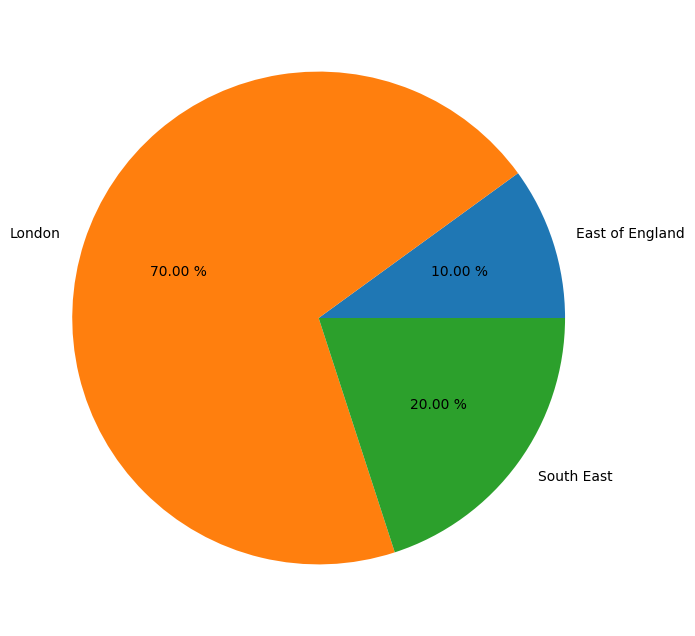

In [151]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8,8))

ax1.pie(xx['Counts'], labels = xx['Regions'],  autopct='%.2f %%')
#ax1.set_title('Blue Cluster 1 - Female')

plt.figure
plt.savefig('pie4_male_r1.eps')

In [33]:
fe1 = female_df.loc[female_df['landmark'].isin([16,17,5,12,22])]
fe2 = female_df.loc[female_df['landmark'].isin([31,26,25,14,27,29,33])]
fe3 = female_df.loc[female_df['landmark'].isin([11,23,4,7,2,24,1,10,15])]

In [44]:
fe1

,points,landmark,Lower tier local authorities Code,low_edu,median_edu,high_edu,Asian_dis,Black_dis,Mixed_dis,White_dis,Employed_scaled,managerial_per,intermediate_per,low_per,unemployed_per,LE_index,Good_health_per,LE
162,14,5,E06000014,0.430978,0.560049,0.442512,0.054817,0.016655,0.146365,0.931600,0.759738,0.388684,0.527088,0.497563,0.467035,0.535156,0.728726,83.65
163,17,5,E06000017,0.415264,0.722805,0.397502,0.016973,0.023235,0.118830,0.962849,0.867273,0.532074,0.612997,0.437068,0.180223,0.763021,0.820023,85.40
164,22,5,E06000022,0.353637,0.555430,0.466231,0.053383,0.027091,0.269029,0.915933,0.668360,0.446297,0.518318,0.417140,0.412816,0.718750,0.749688,85.06
165,46,5,E06000049,0.469772,0.705159,0.346471,0.039943,0.015648,0.149469,0.943679,0.782612,0.452782,0.633387,0.475176,0.224039,0.592448,0.690104,84.09
166,47,5,E06000050,0.521768,0.696053,0.323763,0.032995,0.015228,0.110925,0.955707,0.710913,0.380129,0.616185,0.538180,0.308353,0.492187,0.596622,83.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,117,22,E07000094,0.280253,0.535456,0.491116,0.054178,0.016594,0.171708,0.931615,0.706910,0.563559,0.481878,0.298579,0.291241,0.787760,0.863168,85.59
574,202,22,E07000207,0.212501,0.426463,0.483270,0.137629,0.041897,0.452965,0.814949,0.524837,0.613618,0.448086,0.170860,0.209586,0.795573,0.941782,85.65
575,204,22,E07000209,0.323547,0.505694,0.473239,0.120256,0.042608,0.294242,0.847835,0.627126,0.522616,0.529513,0.282653,0.368167,0.796875,0.877833,85.66
576,211,22,E07000216,0.286606,0.556216,0.456766,0.049726,0.019856,0.207201,0.931057,0.668274,0.584534,0.552651,0.267935,0.192574,0.792969,0.887093,85.63


In [41]:
fe1

,points,landmark,Lower tier local authorities Code,low_edu,median_edu,high_edu,Asian_dis,Black_dis,Mixed_dis,White_dis,Employed_scaled,managerial_per,intermediate_per,low_per,unemployed_per,LE_index,Good_health_per,LE
162,14,5,E06000014,0.430978,0.560049,0.442512,0.054817,0.016655,0.146365,0.931600,0.759738,0.388684,0.527088,0.497563,0.467035,0.535156,0.728726,83.65
163,17,5,E06000017,0.415264,0.722805,0.397502,0.016973,0.023235,0.118830,0.962849,0.867273,0.532074,0.612997,0.437068,0.180223,0.763021,0.820023,85.40
164,22,5,E06000022,0.353637,0.555430,0.466231,0.053383,0.027091,0.269029,0.915933,0.668360,0.446297,0.518318,0.417140,0.412816,0.718750,0.749688,85.06
165,46,5,E06000049,0.469772,0.705159,0.346471,0.039943,0.015648,0.149469,0.943679,0.782612,0.452782,0.633387,0.475176,0.224039,0.592448,0.690104,84.09
166,47,5,E06000050,0.521768,0.696053,0.323763,0.032995,0.015228,0.110925,0.955707,0.710913,0.380129,0.616185,0.538180,0.308353,0.492187,0.596622,83.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,117,22,E07000094,0.280253,0.535456,0.491116,0.054178,0.016594,0.171708,0.931615,0.706910,0.563559,0.481878,0.298579,0.291241,0.787760,0.863168,85.59
574,202,22,E07000207,0.212501,0.426463,0.483270,0.137629,0.041897,0.452965,0.814949,0.524837,0.613618,0.448086,0.170860,0.209586,0.795573,0.941782,85.65
575,204,22,E07000209,0.323547,0.505694,0.473239,0.120256,0.042608,0.294242,0.847835,0.627126,0.522616,0.529513,0.282653,0.368167,0.796875,0.877833,85.66
576,211,22,E07000216,0.286606,0.556216,0.456766,0.049726,0.019856,0.207201,0.931057,0.668274,0.584534,0.552651,0.267935,0.192574,0.792969,0.887093,85.63


In [32]:
fe2.describe()

,points,landmark,low_edu,median_edu,high_edu,Asian_dis,Black_dis,Mixed_dis,White_dis,Employed_scaled,managerial_per,intermediate_per,low_per,unemployed_per,LE_index,Good_health_per,LE
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,276.735294,25.588235,0.345764,0.237161,0.528533,0.368214,0.468868,0.739806,0.380938,0.447577,0.495372,0.252361,0.277791,0.605301,0.683747,0.715252,84.791176
std,46.921797,5.427861,0.127090,0.077187,0.129987,0.235818,0.262084,0.154267,0.164097,0.116233,0.127981,0.099168,0.083769,0.118506,0.135106,0.097118,1.037616
min,57.000000,14.000000,0.110790,0.111473,0.303948,0.145773,0.065821,0.415020,0.051881,0.167600,0.262007,0.072717,0.094046,0.266332,0.497396,0.526426,83.360000
25%,283.250000,25.000000,0.239985,0.164762,0.404279,0.206942,0.287709,0.621829,0.291154,0.382677,0.402725,0.175740,0.224289,0.552665,0.603516,0.666231,84.175000
50%,288.500000,26.500000,0.336913,0.239443,0.535456,0.268845,0.430256,0.779880,0.386996,0.444183,0.497577,0.243613,0.269591,0.628496,0.677083,0.727318,84.740000
75%,294.750000,29.000000,0.456912,0.298605,0.641826,0.403883,0.639197,0.816249,0.474995,0.528030,0.593804,0.319481,0.328834,0.661878,0.724935,0.747039,85.107500
max,305.000000,33.000000,0.651549,0.358914,0.714306,1.000000,1.000000,1.000000,0.726918,0.686947,0.731507,0.439415,0.450798,0.863071,1.000000,0.906989,87.220000


In [34]:
fe3.describe()

,points,landmark,low_edu,median_edu,high_edu,Asian_dis,Black_dis,Mixed_dis,White_dis,Employed_scaled,managerial_per,intermediate_per,low_per,unemployed_per,LE_index,Good_health_per,LE
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,157.960000,8.808000,0.756331,0.706805,0.136918,0.215940,0.106684,0.218743,0.768458,0.434364,0.165270,0.572535,0.673542,0.491290,0.304583,0.438536,81.879200
std,105.196314,7.138826,0.087842,0.113490,0.055012,0.218807,0.136721,0.167586,0.213206,0.177907,0.056114,0.107779,0.119750,0.161581,0.123591,0.151561,0.949183
min,1.000000,1.000000,0.551560,0.362731,0.000000,0.006179,0.002351,0.009685,0.092710,0.000000,0.024261,0.273301,0.404726,0.211892,0.000000,0.000000,79.540000
25%,37.000000,1.000000,0.704161,0.639289,0.108308,0.031862,0.014879,0.095497,0.643477,0.322266,0.133820,0.507736,0.594097,0.353469,0.223958,0.351123,81.260000
50%,162.000000,10.000000,0.758160,0.728690,0.126094,0.117511,0.042069,0.148391,0.803532,0.484810,0.164785,0.573292,0.686526,0.454720,0.291667,0.461343,81.780000
75%,255.000000,15.000000,0.821361,0.790355,0.172299,0.325980,0.140040,0.329234,0.948006,0.557349,0.198848,0.652171,0.761359,0.597243,0.388021,0.536552,82.520000
max,327.000000,24.000000,1.000000,0.923090,0.307892,0.993073,0.786675,0.698828,0.992937,0.771892,0.317514,0.804993,1.000000,0.927833,0.697917,0.777633,84.900000


In [35]:
male1 = male_df.loc[male_df['landmark'].isin([39,1,5,2])]
male2 = male_df.loc[male_df['landmark'].isin([4,31,11,13])]
male3 = male_df.loc[male_df['landmark'].isin([25,21,22,7,10,24,15])]
male4 = male_df.loc[male_df['landmark'].isin([30,38,37,34,17,32])]

In [36]:
male1.describe()

,points,landmark,low_edu,median_edu,high_edu,Asian_dis,Black_dis,Mixed_dis,White_dis,Employed_scaled,managerial_per,intermediate_per,low_per,unemployed_per,LE_index,Good_health_per,LE
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,179.169811,3.509434,0.738213,0.781896,0.142161,0.102239,0.041983,0.126490,0.888880,0.368709,0.131687,0.744589,0.737188,0.486101,0.282047,0.311185,77.355849
std,121.541341,7.279113,0.092582,0.071825,0.050489,0.127807,0.043519,0.087871,0.114109,0.088833,0.046538,0.095853,0.081401,0.110941,0.092296,0.152513,0.967259
min,1.000000,1.000000,0.503609,0.537422,0.038271,0.008266,0.003148,0.012945,0.536125,0.151924,0.000000,0.537726,0.574146,0.339307,0.000000,0.000000,74.400000
25%,26.000000,1.000000,0.677042,0.732955,0.103901,0.021497,0.011194,0.063883,0.802668,0.322889,0.100732,0.692508,0.683904,0.408910,0.235687,0.237128,76.870000
50%,242.000000,1.000000,0.727968,0.800027,0.131495,0.044061,0.024725,0.105664,0.940472,0.384897,0.139792,0.754360,0.732233,0.466560,0.302481,0.335600,77.570000
75%,260.000000,5.000000,0.808432,0.827195,0.168649,0.108780,0.046816,0.158322,0.970054,0.441343,0.168059,0.806195,0.782662,0.546044,0.339695,0.434830,77.960000
max,327.000000,39.000000,1.000000,0.928098,0.259397,0.517277,0.157586,0.406346,0.988197,0.497124,0.214887,0.947825,0.977719,0.876342,0.429389,0.664137,78.900000


In [37]:
male2.describe()

,points,landmark,low_edu,median_edu,high_edu,Asian_dis,Black_dis,Mixed_dis,White_dis,Employed_scaled,managerial_per,intermediate_per,low_per,unemployed_per,LE_index,Good_health_per,LE
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,197.666667,10.047619,0.722065,0.589829,0.145732,0.535094,0.259450,0.405557,0.436005,0.175600,0.131178,0.495895,0.634132,0.614652,0.329244,0.547198,77.850476
std,103.135994,8.034153,0.090498,0.090858,0.065055,0.175110,0.188449,0.169299,0.154023,0.083424,0.042822,0.059293,0.097022,0.147309,0.064824,0.111246,0.679356
min,8.000000,4.000000,0.578696,0.375777,0.029447,0.300699,0.006439,0.127132,0.062262,0.000000,0.016363,0.387151,0.466979,0.351649,0.188931,0.427547,76.380000
25%,141.000000,4.000000,0.645517,0.542800,0.114812,0.390117,0.136087,0.293107,0.377756,0.151924,0.110475,0.470405,0.582393,0.531369,0.279580,0.471213,77.330000
50%,261.000000,11.000000,0.724793,0.621683,0.126110,0.517277,0.285453,0.369728,0.435723,0.183347,0.143454,0.502013,0.630742,0.576146,0.329198,0.525251,77.850000
75%,267.000000,13.000000,0.747495,0.645083,0.160456,0.671793,0.353517,0.507746,0.536125,0.235442,0.154833,0.537726,0.688797,0.642754,0.349237,0.603208,78.060000
max,274.000000,31.000000,0.947825,0.705579,0.309002,0.980653,0.810944,0.713967,0.644827,0.301325,0.210304,0.609671,0.820625,1.000000,0.452290,0.853163,79.140000


In [39]:
male3.describe()

,points,landmark,low_edu,median_edu,high_edu,Asian_dis,Black_dis,Mixed_dis,White_dis,Employed_scaled,managerial_per,intermediate_per,low_per,unemployed_per,LE_index,Good_health_per,LE
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,137.095238,17.034632,0.455333,0.694445,0.333560,0.056864,0.037051,0.200964,0.917416,0.639514,0.493293,0.520344,0.360984,0.246233,0.638949,0.746544,81.096190
std,71.826418,6.464526,0.091821,0.094148,0.062542,0.058227,0.035386,0.115303,0.069733,0.082322,0.071708,0.102224,0.100923,0.087986,0.086327,0.117250,0.904712
min,7.000000,7.000000,0.221253,0.437865,0.170684,0.001340,0.001095,0.023939,0.678105,0.415246,0.296200,0.227469,0.122860,0.154181,0.351145,0.370586,78.080000
25%,84.500000,10.000000,0.390618,0.633366,0.296617,0.018371,0.014680,0.112158,0.892204,0.588454,0.442684,0.445643,0.300756,0.189151,0.588263,0.660256,80.565000
50%,121.000000,21.000000,0.453701,0.698276,0.331893,0.038747,0.025674,0.170177,0.938196,0.641159,0.498992,0.533084,0.375814,0.219229,0.648855,0.764477,81.200000
75%,195.000000,22.000000,0.500743,0.770464,0.370360,0.068968,0.047822,0.267285,0.968431,0.698807,0.547541,0.600008,0.426958,0.267694,0.692748,0.835458,81.660000
max,326.000000,25.000000,0.696934,0.912353,0.501471,0.307525,0.285812,0.652856,0.995564,0.853661,0.672711,0.759031,0.553976,0.668876,0.833015,1.000000,83.130000


In [40]:
male4.describe()

,points,landmark,low_edu,median_edu,high_edu,Asian_dis,Black_dis,Mixed_dis,White_dis,Employed_scaled,managerial_per,intermediate_per,low_per,unemployed_per,LE_index,Good_health_per,LE
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,262.821429,31.321429,0.285937,0.255789,0.543182,0.218413,0.370035,0.732399,0.545591,0.429826,0.555765,0.215632,0.187989,0.499399,0.648923,0.791874,81.200714
std,67.430103,6.566207,0.087647,0.104064,0.077891,0.089546,0.279021,0.202796,0.169181,0.082331,0.074015,0.081600,0.078981,0.178638,0.153846,0.136641,1.612302
min,39.000000,17.000000,0.121197,0.135401,0.411447,0.040327,0.021454,0.207819,0.324694,0.227391,0.396048,0.018967,0.039750,0.195731,0.452290,0.574840,79.140000
25%,278.000000,30.000000,0.229654,0.178421,0.479027,0.173251,0.089962,0.646942,0.435142,0.412286,0.522467,0.174727,0.133559,0.372316,0.509781,0.674296,79.742500
50%,291.000000,32.000000,0.273886,0.223562,0.575606,0.197657,0.380567,0.792654,0.493277,0.426738,0.544147,0.227212,0.193987,0.560657,0.630248,0.797305,81.005000
75%,295.250000,37.000000,0.351122,0.329222,0.608152,0.264132,0.491154,0.870011,0.673552,0.454394,0.618247,0.273874,0.232780,0.627239,0.779819,0.905054,82.572500
max,305.000000,38.000000,0.471084,0.480514,0.665049,0.392227,1.000000,1.000000,0.937187,0.594107,0.680358,0.345880,0.329566,0.823756,1.000000,1.000000,84.880000
